##  QUESTION1

Q1a)


In [110]:
#The Predicted Value of y_hat(x) for x = 1.
y_hat= round(0.4 + 0.8*(1),2)
y_true = 1
y_hat
# The error for when x=1
error = round(0.5 * (y_hat - y_true)**2,2)

#print the y_hat and error
print("y_hat = ", y_hat)
print("error = ", error)

y_hat =  1.2
error =  0.02


Q1b)

In [111]:
#The Predicted Value of y_hat(x) for x = 2.
y_hat= 0.4 + 0.8*(2)
y_true = 3
y_hat

# The error for when x=2
error = round(0.5 * (y_hat - y_true)**2,2)

#print the y_hat and error
print("y_hat = ", y_hat)
print("error = ", error)

y_hat =  2.0
error =  0.5


Q1c)

In [112]:
#sum of squares error for this model

def y_hat(x):
    y = 0.4 + 0.8*(x)
    return y

# x values
x_values = [1,2,3,4,5]
# y avlues
y_values = [1,3,2,3,5]
y_predicted = []
error = 0.0
for x in x_values:
    y_predicted.append(round(y_hat(x),2))

for i in range(len(y_values)):
    error += 0.5 * (y_values[i] - y_predicted[i])**2

error = round(error, 2)
error

1.2

## QUESTION 4

# a)

i. Generating random sample data

In [113]:
import numpy as np

mean = 0
std = 10
size = 150

sample = np.random.normal(mean, std, size)


ii. Constructing design matrix from sample data

In [114]:
def designMatrix(s, rows, cols):
    design = np.ones((rows, cols))
    for i in range(cols):
        design[:,i] = s**i
    return design

design = designMatrix(sample, 150, 3)

print(design)


[[ 1.00000000e+00  8.55034250e+00  7.31083569e+01]
 [ 1.00000000e+00  9.92534979e+00  9.85125685e+01]
 [ 1.00000000e+00 -2.58218904e+00  6.66770026e+00]
 [ 1.00000000e+00 -1.94700397e+00  3.79082445e+00]
 [ 1.00000000e+00 -1.47005825e+00  2.16107125e+00]
 [ 1.00000000e+00 -3.95353304e-01  1.56304235e-01]
 [ 1.00000000e+00 -2.46260732e+00  6.06443483e+00]
 [ 1.00000000e+00 -7.54483310e+00  5.69245064e+01]
 [ 1.00000000e+00 -1.72011641e+01  2.95880046e+02]
 [ 1.00000000e+00  1.51049001e+01  2.28158008e+02]
 [ 1.00000000e+00  6.29705399e+00  3.96528890e+01]
 [ 1.00000000e+00  2.00688727e+01  4.02759650e+02]
 [ 1.00000000e+00 -1.28742045e+00  1.65745140e+00]
 [ 1.00000000e+00  1.07556008e+01  1.15682950e+02]
 [ 1.00000000e+00 -3.98389097e+00  1.58713872e+01]
 [ 1.00000000e+00 -8.34053421e+00  6.95645109e+01]
 [ 1.00000000e+00  4.07728834e+00  1.66242802e+01]
 [ 1.00000000e+00 -3.72817537e+00  1.38992916e+01]
 [ 1.00000000e+00  2.15944536e+00  4.66320427e+00]
 [ 1.00000000e+00  2.76885652e+

iii. Sample true values for theta, (3 values - corresponds to features)

In [115]:
theta = np.random.uniform(0, 1, 3)

theta0 = theta[0]
theta1 = theta[1]
theta2 = theta[2]

print(theta)

[0.85703556 0.54600297 0.68107535]


iv. Generate y values using design matrix and true parameter. Also add noise to make data more realistic

In [116]:
mean = 0
std = 8
size = 150

noise = np.random.normal(mean, std, size)

y = np.dot(design, theta) + noise

print(y)

[ 5.51449098e+01  7.52092421e+01  2.32891821e+01  3.46795178e-01
  8.11385486e+00 -4.81007436e-02 -1.39066363e+00  2.07140707e+01
  1.97198243e+02  1.64452981e+02  3.29403431e+01  3.00148107e+02
 -7.73149302e+00  9.46019943e+01  1.48600730e+01  4.35996645e+01
  1.80014991e+01  9.45929166e+00  1.04577789e+00  1.21848435e+01
  8.26674134e+01  3.32806084e+02  2.49210505e+01  1.21115390e+02
  4.41274842e+02  7.26918880e+01  1.58181769e+02  1.05020382e+02
  1.78515543e+02  9.62797791e+01  2.44083090e+01  1.53006855e+02
  2.40929876e+00  1.90451909e+01  8.36328265e+01  8.26920189e+01
  1.19195594e+01  2.51712388e+02  3.04942509e+01  6.12509059e+02
  1.50275150e+01  1.20542821e+00  9.34640502e+01  8.73187461e+01
  1.59969191e+02  6.90533420e+01 -2.08754744e-01  1.03880232e+02
  5.98178209e+01  1.20846988e+01  4.83313812e+01  6.01321313e+01
  1.24045841e+02  1.93584522e+01  8.23708440e+01  1.38636611e+02
  2.66317108e+00  2.59007091e+02  3.02739305e+01  1.07685019e+01
  1.04681835e+01 -8.22105

v. Plot sample data with generated y values

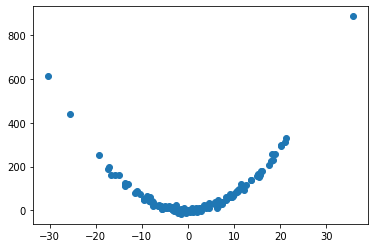

In [117]:
import matplotlib.pyplot as plt

plt.scatter(sample, y)
plt.show()

vi. Split sample data into training, testing and validation data

In [118]:
#90 of 150 for training (60%)
#30 of 150 for testing (20%)
#30 of 150 for validation (20%)

#Training
training_x_values = sample[:90]
training_y_values = y[:90]
trainDMB = design[:90]

#Testing
testing_x_values = sample[120:150]
testing_y_values = y[120:150]
testDMB = design[120:150]

#Validation
validation_x_values = sample[90:120]
validation_y_values = y[90:120]
validDMB = design[90:120]

# print(training_x_values)


# b)

i. Use Moore-Penrose pseudo-inverse to calculate the closed form solution

In [119]:
def moorePenrose(DMatrix, y_values):
    dmTranspose = np.transpose(DMatrix)
    firstPart = np.linalg.inv(np.dot(dmTranspose, DMatrix))
    secondPart = np.dot(dmTranspose, y_values)
    finalMoore = np.dot(firstPart, secondPart)
    return finalMoore

moore_penrose = moorePenrose(trainDMB, training_y_values)

print(moore_penrose)
# print(theta)


[0.10414915 0.56816255 0.68883531]


ii. How close are the learned parameter values to the true parameters?

In [120]:
# The learned parameter values, with the exception of theta0, which is off from the true value by a significant value.
# While theta1 is off by approx. 0.004 and theta2 is off by approx 0.005, which is relatively close to the true parameters.  

iii. Compute the training and validation error of the model

In [121]:
import math

def mooreError(x_values, y_values):
    sum = 0
    index = 0

    for x in x_values:
        y_predicted = moore_penrose[0] + moore_penrose[1] * x + moore_penrose[2] * math.pow(x, 2)
        error = y_values[index] - y_predicted
        sum += math.pow(error,2)
        index += 1

    totalError = (1 / (2 * 150)) * sum # Since the fraction is valid as long as its a constant (slides)
    return totalError

trainingError = mooreError(training_x_values, training_y_values)
validationError = mooreError(validation_x_values, validation_y_values)

print(trainingError)
print(validationError)

18.00519002814895
7.606597157896336


iv. Plot of the data and the regression model

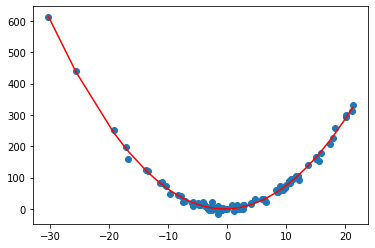

In [122]:
import matplotlib.pyplot as plt

sorted_trainX = trainDMB[trainDMB[:,1].argsort()]
sorted_trainY = np.dot(sorted_trainX, moore_penrose)

plt.scatter(training_x_values, training_y_values)
plt.plot(sorted_trainX[:,1], sorted_trainY, "r")
plt.show()

v. Repeat the above process using Gradient Descent to train your model. In addition, plot the
training error of your regression model over time (observe or capture the training error every 20
parameter updates/time steps). Your plot should look like Figure 2c.

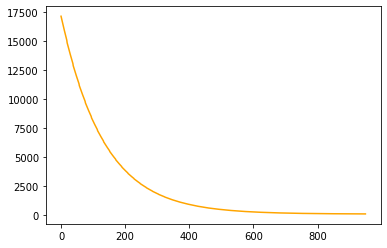

[0.00212023 0.00907373 0.67270596]
Testing error:  2480.010343085759
Validation error:  2308.6140194376853


In [158]:
import numpy as np

def gradient_descent(X, y, learning_rate=0.0000001, num_iterations=1000):
    # Initialize parameters
    m, n = X.shape
    theta = np.zeros(n)
    errors = []

    # Perform gradient descent
    for i in range(num_iterations):
        # Compute predictions
        y_pred = X.dot(theta)

        # Compute errors
        error = y_pred - y
        
        if (i % 20):
            errors.append(np.mean(error**2))

        # Compute gradients
        grad = np.dot(X.T, error) / m

        # Update parameters
        theta = theta - learning_rate * grad

    return theta, errors


thetaB, errorB = gradient_descent(trainDMB, training_y_values)

plt.plot(errorB, color="orange")
plt.show()

print(thetaB)

validation_thetaB, validation_errorB = gradient_descent(validDMB, validation_y_values)
testingErrorB = np.mean(errorB)
validationErrorB = np.mean(validation_errorB)
print("Testing error: ", testingErrorB)
print("Validation error: ", validationErrorB)


# C)

i. Begin by appending a third feature to your design matrix for x3

In [124]:
# Adding x^3 column
def designMatrix(s, rows, cols):
    design = np.ones((rows, cols))
    for i in range(cols):
        design[:,i] = s**i
    return design

designX3 = designMatrix(sample, 150, 4)

print(designX3)

[[ 1.00000000e+00  8.55034250e+00  7.31083569e+01  6.25101491e+02]
 [ 1.00000000e+00  9.92534979e+00  9.85125685e+01  9.77771702e+02]
 [ 1.00000000e+00 -2.58218904e+00  6.66770026e+00 -1.72172626e+01]
 [ 1.00000000e+00 -1.94700397e+00  3.79082445e+00 -7.38075023e+00]
 [ 1.00000000e+00 -1.47005825e+00  2.16107125e+00 -3.17690061e+00]
 [ 1.00000000e+00 -3.95353304e-01  1.56304235e-01 -6.17953955e-02]
 [ 1.00000000e+00 -2.46260732e+00  6.06443483e+00 -1.49343216e+01]
 [ 1.00000000e+00 -7.54483310e+00  5.69245064e+01 -4.29485900e+02]
 [ 1.00000000e+00 -1.72011641e+01  2.95880046e+02 -5.08948123e+03]
 [ 1.00000000e+00  1.51049001e+01  2.28158008e+02  3.44630392e+03]
 [ 1.00000000e+00  6.29705399e+00  3.96528890e+01  2.49696383e+02]
 [ 1.00000000e+00  2.00688727e+01  4.02759650e+02  8.08293214e+03]
 [ 1.00000000e+00 -1.28742045e+00  1.65745140e+00 -2.13383683e+00]
 [ 1.00000000e+00  1.07556008e+01  1.15682950e+02  1.24423963e+03]
 [ 1.00000000e+00 -3.98389097e+00  1.58713872e+01 -6.32298762e

ii. Train a model using Gradient Descent with the new design matrix. Repeat the process used above
    in Question 4b. Note, we are now using a third-order polynomial to fit data which was generated
    using a second-order polynomial. Our function is, thus, more complicated than is necessary to
    fit the data and as a result will overfit.

True values of parameters

In [125]:
# This is from 4 a) 
thetaX3 = np.random.uniform(0, 1, 4)

theta0 = thetaX3[0]
theta1 = thetaX3[1]
theta2 = thetaX3[2]
theta3 = thetaX3[3]

print(thetaX3)


[0.83815739 0.69779017 0.2758925  0.29513018]


Spliting data into training, test and validation

In [126]:
# #Training
training_x_values = sample[:90]
training_y_values = y[:90]
trainDMC = designX3[:90]

#Testing
testing_x_values = sample[120:150]
testing_y_values = y[120:150]
testDMC = designX3[120:150]

#Validation
validation_x_valuesX3 = sample[90:120]
validation_y_valuesX3 = y[90:120]
validDMC = designX3[90:120]

Use Moore Penrose to generate closed form solution to the model parameter values (NOT NEEDED)

[1.15571645e-02 5.14809932e-01 6.90200160e-01 1.60897852e-04]


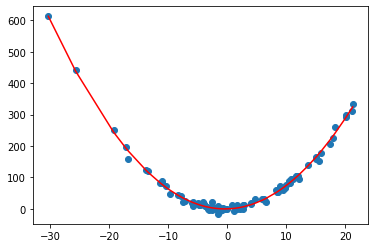

In [127]:
import matplotlib.pyplot as plt

moore_penrose = moorePenrose(trainDMC, training_y_values)
print(moore_penrose)

sorted_trainX = trainDMC[trainDMC[:,1].argsort()]
sorted_trainY = np.dot(sorted_trainX, moore_penrose)

plt.scatter(training_x_values, training_y_values)
plt.plot(sorted_trainX[:,1], sorted_trainY, "r")
plt.show()

Regularised Moore-Penrose

[1.14637180e-02 5.14633273e-01 6.90202966e-01 1.61269829e-04]


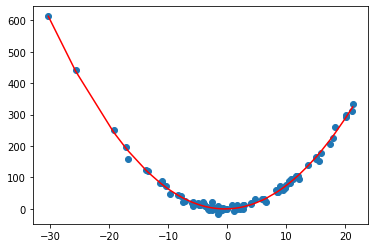

In [135]:

matrix = np.identity(len(trainDMC[0]))
matrix[0][0] = 0
matrix

def Reg_moorePenrose(DMatrix, y_values, l):
    dmTranspose = np.transpose(DMatrix)
    firstPart = np.linalg.inv(np.dot(dmTranspose, DMatrix) + (l * matrix))
    secondPart = np.dot(dmTranspose, y_values)
    finalMoore = np.dot(firstPart, secondPart)
    return finalMoore

reg_moore_penrose = Reg_moorePenrose(trainDMC, training_y_values, 1)

print(reg_moore_penrose)

reg_sorted_trainX = trainDMC[trainDMC[:,1].argsort()]
reg_sorted_trainY = np.dot(reg_sorted_trainX, reg_moore_penrose)

plt.scatter(training_x_values, training_y_values)
plt.plot(reg_sorted_trainX[:,1], reg_sorted_trainY, "r")
plt.show()


Gradient Descent Method

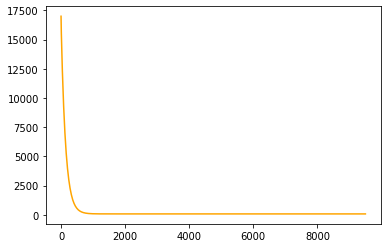

Testing error:  311.1557823746086
Validation error:  314.5269513745276


In [154]:
def gradient_descent(X, y, learning_rate=0.0000001, num_iterations=10000):
    # Initialize parameters
    m, n = X.shape
    theta = np.zeros(n)
    errors = []
    
    # Perform gradient descent
    for i in range(num_iterations):
        # Compute the hypothesis (predicted values)
        y_pred = np.dot(X, theta)
        
        error = y_pred - y
        
        if (i % 20):
            errors.append(np.mean(error**2))

        # Compute the gradient of the cost function
        gradient = np.dot(X.T, error) / m

        # Update the parameters
        theta -= learning_rate * gradient

    return theta, errors

thetaC1, errorC1 = gradient_descent(trainDMC, training_y_values)


plt.plot(errorC1, color="orange")
plt.show()

validation_thetaC1, validation_errorC1 = gradient_descent(validDMC, validation_y_values)
testingErrorC1 = np.mean(errorC1)
validationErrorC1 = np.mean(validation_errorC1)
print("Testing error: ", testingErrorC1)
print("Validation error: ", validationErrorC1)


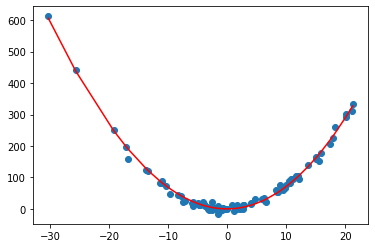

In [130]:
sorted_trainX = trainDMC[trainDMC[:,1].argsort()]
sorted_trainY = np.dot(sorted_trainX, thetaC1)


plt.scatter(training_x_values, training_y_values)
plt.plot(sorted_trainX[:,1], sorted_trainY, "r")
plt.show()

iii. Repeat the training process one final time, this time use regularization when training the third-order polynomial model.

Regularised Gradient Descent

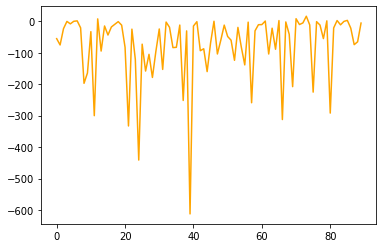

[ 7.65590706e-29  1.70158802e-28  2.48597885e-26 -1.09604660e-25]


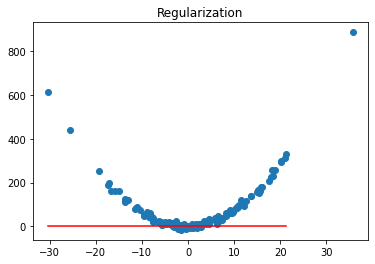

Testing error:  -76.5590706101661
Validation error:  -55.14771610635704


In [170]:
def Reg_gradient_descent(X, y, learning_rate=1*10**-30, num_iterations=1000, l=1):
    # Initialize parameters
    m, n = X.shape
    theta = np.zeros(n, dtype=float)
    errors = np.empty(m ,dtype=float)
    
    # Perform gradient descent
    for i in range(num_iterations):
        # Compute the hypothesis (predicted values)
        y_pred = np.dot(X, theta)
        
        error = y_pred - y
        
        if (i % 20):
            np.append(errors, np.mean(error**2))

        # Compute the gradient of the cost function
        gradient = np.dot(X.T, error) / m

        # Update the parameters
        theta -= (learning_rate * gradient + (l * theta))

    return theta, error

thetaC2, errorC2 = Reg_gradient_descent(trainDMC, training_y_values)

plt.plot(errorC2, color="orange")
plt.show()

print(thetaC2)

sorted_trainX = trainDMC[trainDMC[:,1].argsort()]
sorted_trainY = np.dot(sorted_trainX, thetaC2)

plt.title('Regularization')
plt.scatter(sample, y)
plt.plot(sorted_trainX[:,1], sorted_trainY,'r') 
plt.show()

validation_thetaC2, validation_errorC2 = Reg_gradient_descent(validDMC, validation_y_values)
testingErrorC2 = np.mean(errorC2)
validationErrorC2 = np.mean(validation_errorC2)
print("Testing error: ", testingErrorC2)
print("Validation error: ", validationErrorC2)

iv. Results

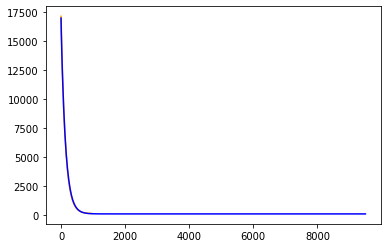

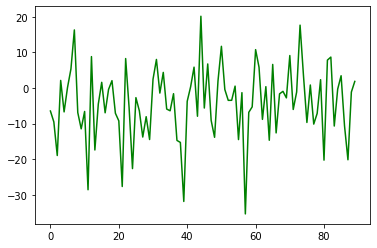

In [133]:
# ERRORS
plt.plot(errorB, color="orange")
plt.plot(errorC1, color="blue")
plt.show()

plt.plot(errorC2, color="green")
plt.show()


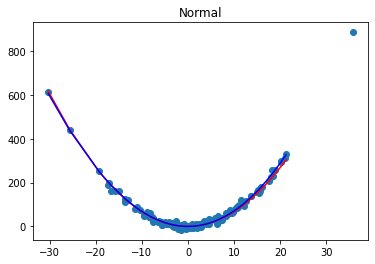

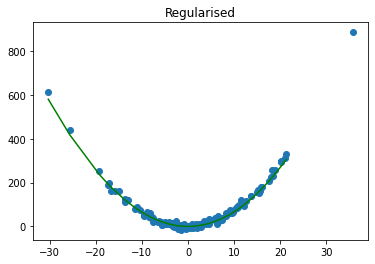

In [134]:
#PLOTS
sorted_trainX = trainDMB[trainDMB[:,1].argsort()]
sorted_trainYB = np.dot(sorted_trainX, thetaB)

sorted_trainX = trainDMC[trainDMC[:,1].argsort()]
sorted_trainYC1 = np.dot(sorted_trainX, thetaC1)
sorted_trainYC2 = np.dot(sorted_trainX, thetaC2)

plt.title('Normal')
plt.scatter(sample, y)
plt.plot(sorted_trainX[:,1], sorted_trainYB,'r')
plt.plot(sorted_trainX[:,1], sorted_trainYC1,'b')

plt.show()

plt.title('Regularised')
plt.scatter(sample, y)
plt.plot(sorted_trainX[:,1], sorted_trainYC2,'g')
plt.show()
